In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df=pd.read_csv("C:/Users/P/Desktop/JupyterNotebook/Sample_Datas/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
df1=df.drop(['availability','society','area_type','balcony'],axis='columns')
df1


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [5]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
df1['bath']=df1['bath'].fillna(df1['bath'].median())

In [7]:
df2=df1.dropna()
df2.shape

(13303, 5)

In [8]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-9-d97910c39351>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [10]:
df2.drop(['size'],axis='columns',inplace=True)

c:\users\p\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2['location_n']=le.fit_transform(df2.location)
df2.head()

<ipython-input-11-96679e93df0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['location_n']=le.fit_transform(df2.location)


,location,total_sqft,bath,price,bhk,location_n
0,Electronic City Phase II,1056,2.0,39.07,2,419
1,Chikka Tirupathi,2600,5.0,120.00,4,317
2,Uttarahalli,1440,2.0,62.00,3,1178
3,Lingadheeranahalli,1521,3.0,95.00,3,756
4,Kothanur,1200,2.0,51.00,2,715


In [12]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df2[~df2['total_sqft'].apply(lambda x:is_float(x))]
df2

,location,total_sqft,bath,price,bhk,location_n
0,Electronic City Phase II,1056,2.0,39.07,2,419
1,Chikka Tirupathi,2600,5.0,120.00,4,317
2,Uttarahalli,1440,2.0,62.00,3,1178
3,Lingadheeranahalli,1521,3.0,95.00,3,756
4,Kothanur,1200,2.0,51.00,2,715
...,...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5,1251
13316,Richards Town,3600,5.0,400.00,4,1003
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2,971
13318,Padmanabhanagar,4689,4.0,488.00,4,906


In [117]:
def sqft_num(x):
    tokens=x.split('-')
    if(len(tokens)==2):
        return((float(tokens[0])+float(tokens[1]))/2)
    try:
        return float(x)
    except:
        return None
sqft_num('1123-123')        

623.0

In [118]:
df4=df2.copy()
df4['total_sqft']=df4['total_sqft'].apply(sqft_num)
df4

,location,total_sqft,bath,price,bhk,location_n
0,Electronic City Phase II,1056.0,2.0,39.07,2,419
1,Chikka Tirupathi,2600.0,5.0,120.00,4,317
2,Uttarahalli,1440.0,2.0,62.00,3,1178
3,Lingadheeranahalli,1521.0,3.0,95.00,3,756
4,Kothanur,1200.0,2.0,51.00,2,715
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,1251
13316,Richards Town,3600.0,5.0,400.00,4,1003
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,971
13318,Padmanabhanagar,4689.0,4.0,488.00,4,906


In [119]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5=df5[df5['price_per_sqft']<100000]
df5.head()

,location,total_sqft,bath,price,bhk,location_n,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,419,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,317,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,1178,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,756,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,715,4250.000000


In [121]:
df6=df5.drop(['location_n'],axis='columns')
df6.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [128]:
df6.location=df6.location.apply(lambda x:x.strip())
location_stats=df6.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield            537
Sarjapur  Road        396
Electronic City       304
Kanakpura Road        271
Thanisandra           236
                     ... 
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
Konappana Agrahara      1
1 Annasandrapalya       1
Name: location, Length: 1286, dtype: int64

In [131]:
loc_stat_lt10=location_stats[location_stats<=10]
loc_stat_lt10

location
BTM 1st Stage         10
Dodsworth Layout      10
Naganathapura         10
Kalkere               10
Ganga Nagar           10
                      ..
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
Konappana Agrahara     1
1 Annasandrapalya      1
Name: location, Length: 1046, dtype: int64

In [137]:
df6.location=df6.location.apply(lambda x:'other' if x in loc_stat_lt10 else x)
df6.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


In [144]:
df6['sqfeet_per_bedroom']=df6['total_sqft']/df6['bhk']
df7=df6[~(df6['sqfeet_per_bedroom']<200)]
df7.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft,sqfeet_per_bedroom
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606,528.000000
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615,650.000000
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556,480.000000
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861,507.000000
4,Kothanur,1200.0,2.0,51.00,2,4250.000000,600.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248,585.000000
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101,683.000000
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182,825.000000
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275,436.666667
10,Whitefield,1800.0,2.0,70.00,3,3888.888889,600.000000


In [146]:
df7.price_per_sqft.describe()

count    12916.000000
mean      6481.700430
std       4071.515345
min        267.829813
25%       4242.819843
50%       5357.142857
75%       7091.231464
max      76923.076923
Name: price_per_sqft, dtype: float64

In [147]:
def outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [151]:
df8=outliers(df7)
df8.price_per_sqft.describe()


count    10631.000000
mean      5712.521719
std       2329.543916
min       2090.909091
25%       4250.362911
50%       5200.000000
75%       6500.000000
max      24509.803922
Name: price_per_sqft, dtype: float64

Text(0, 0.5, 'count')

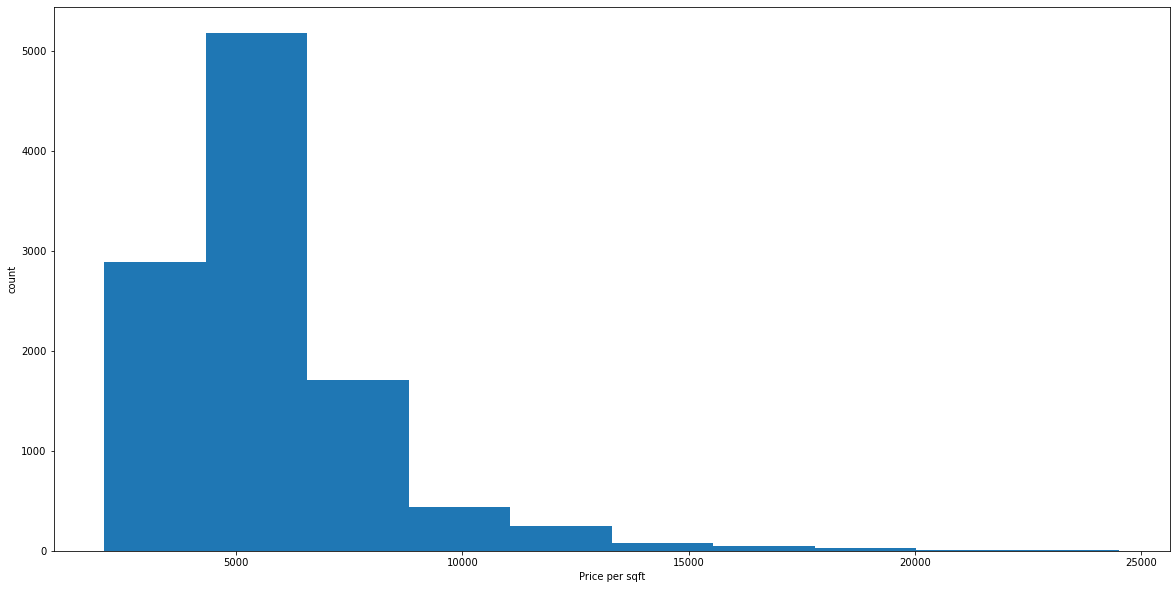

In [197]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.price_per_sqft,rwidth=1)
plt.xlabel('Price per sqft')
plt.ylabel("count")

In [198]:
df8.bath.unique()

array([ 4.,  3.,  6.,  2.,  5.,  8.,  1.,  7.,  9., 12., 10., 27., 16.,
       13.])

In [199]:
df9=df8[~(df8.bath>df8.bhk+2)]
df9

,location,total_sqft,bath,price,bhk,price_per_sqft,sqfeet_per_bedroom
0,1st Block Jayanagar,2850.0,4.0,428.00,4,15017.543860,712.500000
1,1st Block Jayanagar,1630.0,3.0,194.00,3,11901.840491,543.333333
2,1st Block Jayanagar,1200.0,6.0,125.00,6,10416.666667,200.000000
3,1st Block Jayanagar,1875.0,2.0,235.00,3,12533.333333,625.000000
4,1st Block Jayanagar,1200.0,2.0,130.00,3,10833.333333,400.000000
...,...,...,...,...,...,...,...
10626,other,1353.0,2.0,110.00,2,8130.081301,676.500000
10627,other,812.0,1.0,26.00,1,3201.970443,812.000000
10628,other,1440.0,2.0,63.93,3,4439.583333,480.000000
10629,other,1075.0,2.0,48.00,2,4465.116279,537.500000


In [200]:
dff=df9.drop(['price_per_sqft','sqfeet_per_bedroom'],axis='columns')
dff

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.00,4
1,1st Block Jayanagar,1630.0,3.0,194.00,3
2,1st Block Jayanagar,1200.0,6.0,125.00,6
3,1st Block Jayanagar,1875.0,2.0,235.00,3
4,1st Block Jayanagar,1200.0,2.0,130.00,3
...,...,...,...,...,...
10626,other,1353.0,2.0,110.00,2
10627,other,812.0,1.0,26.00,1
10628,other,1440.0,2.0,63.93,3
10629,other,1075.0,2.0,48.00,2


In [201]:
dummyvar=pd.get_dummies(dff.location)
d10=pd.concat([dff.drop('location',axis='columns'),dummyvar.drop('other',axis='columns')],axis='columns')
d10

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.00,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,125.00,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,235.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,130.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10626,1353.0,2.0,110.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10627,812.0,1.0,26.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10628,1440.0,2.0,63.93,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10629,1075.0,2.0,48.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [202]:
x=d10.drop('price',axis='columns')
y=d10['price']

In [203]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)


In [204]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()
le.fit(x_train,y_train)
le.score(x_test,y_test)

0.7621795954498598

In [205]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.78701222, 0.80840679, 0.77388336, 0.80610776, 0.81649893])

In [210]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier

def bestmodel(x,y):
    algos={
        'linear_reg':{
            'model':LinearRegression(),
            'param':{
                
            }
        },
        'Lasso':{
            'model':Lasso(),
            'param':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['param'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_param':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_param'])

In [211]:
bestmodel(x,y)

,model,best_score,best_param
0,linear_reg,0.798382,{}
1,Lasso,0.651791,"{'alpha': 1, 'selection': 'cyclic'}"


In [226]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [231]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]
    
    xi=np.zeros(len(x.columns))
    xi[0]=sqft
    xi[1]=bath
    xi[2]=bhk
    if(loc_index>=0):
        xi[loc_index]=1
    return le.predict(x)[0]

In [235]:
import pickle as pkl
with open('bengaluru_home_price_model','wb') as f:
    pkl.dump(le,f)


In [237]:
import json
columns={
    'data_columns': [col.lower() for col in x.columns]
}
with open('bengaluru_home_price_cols.json','w') as f:
    f.write(json.dumps(columns))